To conduct data interpretation, preprocessing and statistical testing, we employ a variety of Python packages mentioned below:

- **Python Libraries**
    - pandas
    - NumPy
    - Seaborn
    - Warnings
    - matplotlib.pyplot
    - plotly.graph_objs
    - plotly.offline
    - chi2_contingency

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Matplotlib Settings
plt.style.use(["seaborn-ticks"])
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.which"] = "both"
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.figsize"] = (7.5, 5)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.loc"] = "best"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
sns.set(rc=dict(plt.rcParams))

# Output settings
pd.set_option('display.float_format', lambda x: f"{x: 5.5f}")
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

### Data understanding
<hr style="border:2px solid black"> </hr>

This dataset includes anonymized bike travel data from the Los Angeles Metro Bike Share (**Source**: https://bikeshare.metro.net/about/data/). Each row represents a single cycling ride, and each column is described below:

Column | Description
-|:-
trip_id|Locally unique integer that identifies the trip. 
duration|Length of trip in minutes.
start_time|The date/time when the trip began, presented in ISO 8601 format in local time.
end_time| The date/time when the trip ended, presented in ISO 8601 format in local time.
start_station| The station ID where the trip originated (for station name and more information on each station see the Station Table).
start_lat|The latitude of the station where the trip originated.
start_lon| The longitude of the station where the trip originated.
end_station| The station ID where the trip terminated (for station name and more information on each station see the Station Table).
end_lat|The latitude of the station where the trip terminated.
end_lon|The longitude of the station where the trip terminated.
bike_id|Locally unique integer that identifies the bike.
plan_duration| The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up).
trip_route_category| "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips.
passholder_type| The name of the passholder's plan.
bike_type| The kind of bike used on the trip, including standard pedalpowered bikes, electric assist bikes, or smart bikes. 



<hr style="border:1px solid black"> </hr>

### Data overview


-Read the `metro.csv` file to a pandas dataframe, and then display using `metro` for overview.
<br>**Knowledge gained:** A quick glance reveals that the dataframe has 92124 rows and 15 columns, where each row represents a single cycling trip.

In [109]:
metro = pd.read_csv("metro (1).csv")
metro

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92119,130053092,8,9/30/2019 23:32,9/30/2019 23:40,3038,34.046822,-118.248352,3078,34.064281,-118.238937,19655,1,One Way,Walk-up,electric
92120,130053090,15,9/30/2019 23:38,9/30/2019 23:53,4401,34.075611,-118.291862,4401,34.075611,-118.291862,18984,30,Round Trip,Monthly Pass,electric
92121,130053089,1,9/30/2019 23:40,9/30/2019 23:41,3038,34.046822,-118.248352,3067,34.045181,-118.250237,12361,365,One Way,Annual Pass,standard
92122,130053088,22,9/30/2019 23:41,10/1/2019 0:03,3067,34.045181,-118.250237,3049,34.056969,-118.253593,16580,365,One Way,Annual Pass,electric


-`metro.dtypes` attribute used to understand the structure of a dataframe in order to ensure that each column has the correct data type.
<br>**Knowledge gained**: An essential point to note here is that the data type of start time and end time is incorrect; when working with time series data and manipulating dates and times, the datatype must be datatime.

In [110]:
metro.dtypes

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_station            int64
start_lat              float64
start_lon              float64
end_station              int64
end_lat                float64
end_lon                float64
bike_id                 object
plan_duration            int64
trip_route_category     object
passholder_type         object
bike_type               object
dtype: object

-`metro.isnull().sum()`attribute used to determine the amount of missing values in a dataset.
<br>**Knowledge gained:** The major discovery here is that the total number of missing values is 12422; it is critical to scan data and rectify missing values since any dataset with missing values can have a substantial impact on the whole process.

In [111]:
Missing_value= metro.isnull().sum()
Missing_value

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              2139
start_lon              2139
end_station               0
end_lat                4072
end_lon                4072
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

-`metro.describe()`used to generate descriptive statistics of the dataframe with numrical value.
<br>**Knowledge gained**: A few significant facts are that the duration has a minimum value of 1 and a maximum value of 1440, and the plan duration has a minimum value of 1 and a maximum value of 999. flagging them as data outliers.

In [112]:
metro.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,9.212400e+04,92124.000000,92124.000000,89985.000000,89985.000000,92124.000000,88052.000000,88052.000000,92124.000000
mean,1.274286e+08,33.168588,3484.899690,34.034786,-118.287893,3480.271026,34.034895,-118.286699,60.290977
std,1.524134e+06,129.057841,611.483883,0.058803,0.073501,609.942741,0.058790,0.072628,111.141364
min,1.246571e+08,1.000000,3000.000000,33.710979,-118.495422,3000.000000,33.710979,-118.495422,1.000000
25%,1.261375e+08,6.000000,3029.000000,34.035801,-118.281181,3028.000000,34.037048,-118.280952,1.000000
50%,1.274911e+08,12.000000,3062.000000,34.046810,-118.258537,3062.000000,34.046810,-118.258537,30.000000
75%,1.287379e+08,22.000000,4285.000000,34.051941,-118.248253,4285.000000,34.051941,-118.248253,30.000000
max,1.303877e+08,1440.000000,4453.000000,34.177662,-118.231277,4453.000000,34.177662,-118.231277,999.000000


<hr style="border:2px solid black"> </hr>

### Data preprocessing

<hr style="border:.5px solid black"> </hr>

**1. Identifying and handling missing values**



1.1 We already know from the Data overview that Dataframe has 12422 missing values.`metro.dropna`used to eliminate rows with missing values (NaN) with `inplace`parameter to modify the dataframe in place, without creating a new dataframe.
<br>**Knowledge gained**: All missing values have been eliminated, and the same has been checked by `metro.isnull().sum()`.

In [113]:
metro.dropna(inplace=True)
metro.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64

1.2 `metro.shape`shows the number of Rows and columns in the data.
<br>**Knowledge gained:** It reveals that missing values have been eliminated, and the data now consists of 86760 rows rather than 92124.

In [114]:
metro.shape

(86760, 15)

**2. Data Summarising**

2.1A `metro['trip_route_category'].value_counts()` Count the number of times each unique value appears in that column.
<br>**Knowledge gained:** The output shows the total number of one-way and round-trip journeys in the data, revealing that one-way trips outnumber round-trip excursions.

In [115]:
metro['trip_route_category'].value_counts()

One Way       72029
Round Trip    14731
Name: trip_route_category, dtype: int64

2.1B **(visualisation)** `sns.countplot`create a bar plot of the values in the trip_route_category column, and the`container` loop iterates over the bar plot's containers (bins) and adds a label to each bar showing the number of observations in that bin.

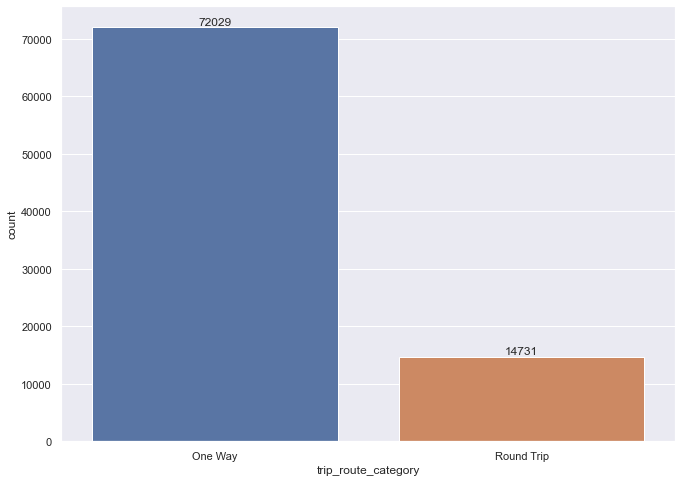

In [116]:
sns.set(rc={'figure.figsize':(11,8)})
Tr = sns.countplot(metro['trip_route_category'])
for container in Tr.containers:
    Tr.bar_label(container)

2.2A `metro['passholder'].value_counts()` Count the number of times each unique value appears in that column.
<br>**Knowledge gained:** The result displays the total number of different types of passholders in the data, with the monthly pass being the most commonly acquired.

In [117]:
metro['passholder_type'].value_counts()

Monthly Pass    55904
Walk-up         21258
Annual Pass      5966
One Day Pass     3599
Testing            27
Flex Pass           6
Name: passholder_type, dtype: int64

2.2B **(visualisation)** `sns.countplot`create a bar plot of the values in the passholder_type column, and the`container` loop iterates over the bar plot's containers (bins) and adds a label to each bar showing the number of observations in that bin.

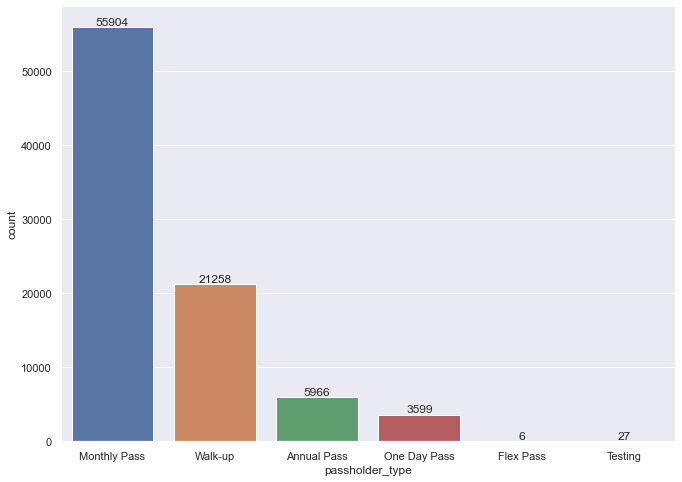

In [118]:
sns.set(rc={'figure.figsize':(11,8)})
Pa = sns.countplot(metro['passholder_type'])
for container in Pa.containers:
    Pa.bar_label(container)

2.2C **(visualisation)** `sns.countplot` create a bar plot of the values in trip_route_category along the passholder_type. Its evident that Monthly pass holder takes the highest number of one way trip.

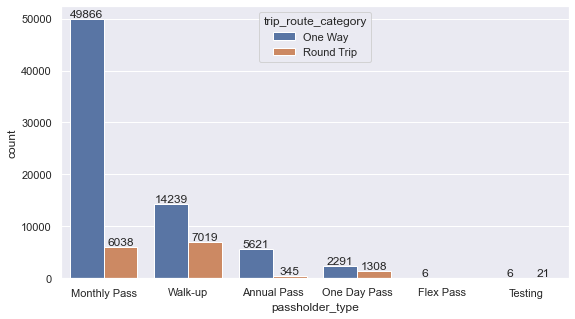

In [119]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
pl = sns.countplot(x='passholder_type', data=metro, hue='trip_route_category')
for container in pl.containers:
    pl.bar_label(container)

2.3A `metro['bike_type'].value_counts()` Count the number of times each unique value appears in that column.
<br>**Knowledge gained:** The outcome shows the overall number of different types of bikes in the data, with electric bikes being the most typically hired.

In [120]:
metro['bike_type'].value_counts()

electric    45818
standard    28966
smart       11976
Name: bike_type, dtype: int64

2.3B **(visualisation)** `sns.countplot`create a bar plot of the values in the bike_type column, and the`container` loop iterates over the bar plot's containers (bins) and adds a label to each bar showing the number of observations in that bin.

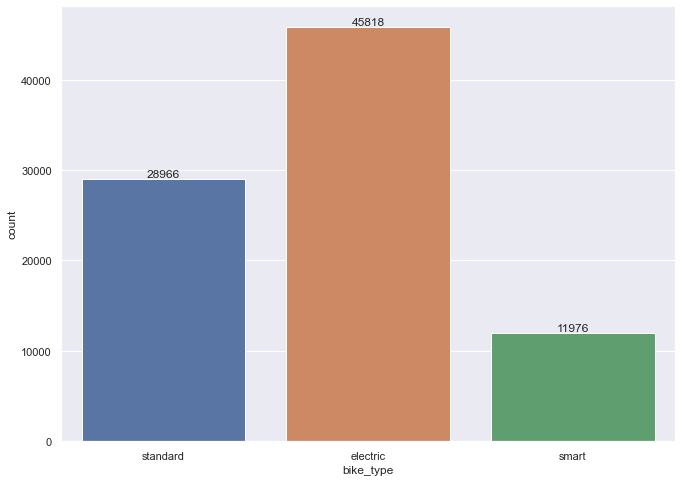

In [121]:
sns.set(rc={'figure.figsize':(11,8)})
Bi = sns.countplot(metro['bike_type'])
for container in Bi.containers:
    Bi.bar_label(container)

2.4A `metro['plan_duration'].value_counts()` Count the number of times each unique value appears in that column.
<br>**Knowledge gained:** The outcome shows the overall number of different plan_duration in the data, monthly pass being the most subscribed among others.

In [122]:
metro['plan_duration'].value_counts()

30     55907
1      21451
365     9375
999       27
Name: plan_duration, dtype: int64

2.4B **(visualisation)** `sns.countplot`create a bar plot of the values in the plan_duration column, and the`container` loop iterates over the bar plot's containers (bins) and adds a label to each bar showing the number of observations in that bin.

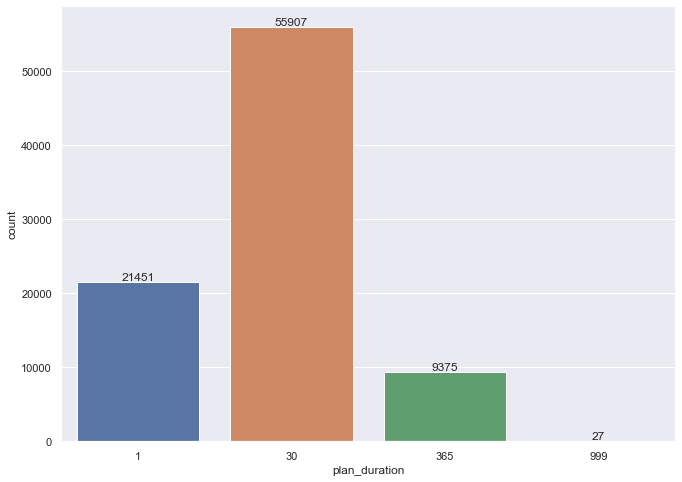

In [123]:
h3 = sns.countplot(data=metro, x='plan_duration')
for container in h3.containers:
    h3.bar_label(container)

2.5 **(visualisation)** `sns.heatmap` Calculating the correlations between the columns of the dataframe. Examining the relationship between each numerical variable.
<br>**Knowledge gained:** It is apparent that start and finish longitudes are inversely correlated to start and end stations.

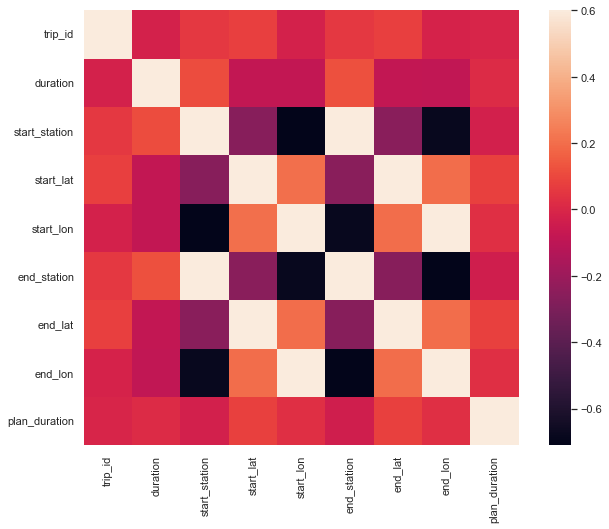

In [124]:
corrmat = metro.corr()
sns.heatmap(corrmat, vmax=.6, square=True);
plt.show()

2.6 **(visualisation)** `sns.distplot`produces a histogram of data with estimating the probability density function of the data and plot it as a dashed curve on top of the histogram. Additional settings for the histogram and probability density function are specified using the `hist kws` and `kde kws` arguments, respectively.'`alpha`' option set to 0.5 to make the bars semi-transparent, while the '`linestyle`' option for the probability density function is set to '--' to make the curve dashed.
<br>**Knowledge gained:** The plan duration values are represented as a histogram, with the probability density function drawn as a curve on top.

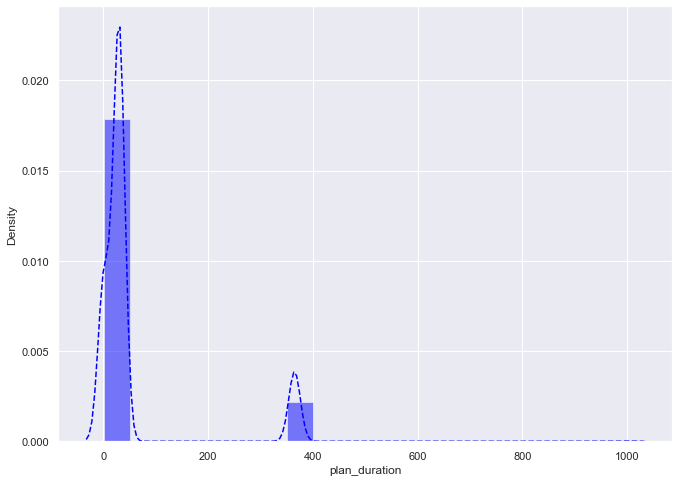

In [125]:
sns.distplot((metro['plan_duration']), bins=20, color='blue', hist_kws={'alpha': 0.5}, kde_kws={'linestyle': '--'})
plt.show()

**3. Data transformation** 

3.1 `pd.to datetime` determine the column's dates' format and process them appropriately. Originally, the dates in the start_time and end_time column were of the object data type.

In [126]:
metro['start_time'] = pd.to_datetime(metro['start_time'])
metro['end_time'] = pd.to_datetime(metro['end_time'])

3.2 Creating four new columns in dataframe based on the start_time column using`dt.day_name`,`dt.month_name`,`dt.year`,`dt.hour`

In [165]:
metro['start_day'] = metro['start_time'].dt.day_name()
metro['start_month'] = metro['start_time'].dt.month_name()
metro['start_year'] = metro['start_time'].dt.year
metro['start_hour'] = metro['start_time'].dt.hour

metro

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_day,start_month,start_year,start_hour
0,124657107,5,2019-07-01 00:04:00,2019-07-01 00:09:00,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard,Monday,July,2019,0
1,124657587,9,2019-07-01 00:07:00,2019-07-01 00:16:00,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric,Monday,July,2019,0
2,124658068,5,2019-07-01 00:20:00,2019-07-01 00:25:00,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric,Monday,July,2019,0
3,124659747,20,2019-07-01 00:44:00,2019-07-01 01:04:00,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard,Monday,July,2019,0
4,124660227,27,2019-07-01 00:44:00,2019-07-01 01:11:00,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard,Monday,July,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92118,130053093,14,2019-09-30 23:20:00,2019-09-30 23:34:00,4415,34.168331,-118.396156,4413,34.158321,-118.370811,15484,30,One Way,Monthly Pass,smart,Monday,September,2019,23
92119,130053092,8,2019-09-30 23:32:00,2019-09-30 23:40:00,3038,34.046822,-118.248352,3078,34.064281,-118.238937,19655,1,One Way,Walk-up,electric,Monday,September,2019,23
92120,130053090,15,2019-09-30 23:38:00,2019-09-30 23:53:00,4401,34.075611,-118.291862,4401,34.075611,-118.291862,18984,30,Round Trip,Monthly Pass,electric,Monday,September,2019,23
92121,130053089,1,2019-09-30 23:40:00,2019-09-30 23:41:00,3038,34.046822,-118.248352,3067,34.045181,-118.250237,12361,365,One Way,Annual Pass,standard,Monday,September,2019,23


3.3A `metro['start_month'].value_counts()` Count the number of times each unique value appears in that column.
<br>**Knowledge gained:** The outcome shows the overall number in each month in the data, As can be seen from the output, August has the most users each month, followed by September and July.

In [128]:
metro['start_month'].value_counts()

August       30876
September    28716
July         27168
Name: start_month, dtype: int64

3.3B **(visualisation)** `sns.countplot`create a bar plot of the values in the `start_month` column, and the`container` loop iterates over the bar plot's containers (bins) and adds a label to each bar showing the number of observations in that bin.

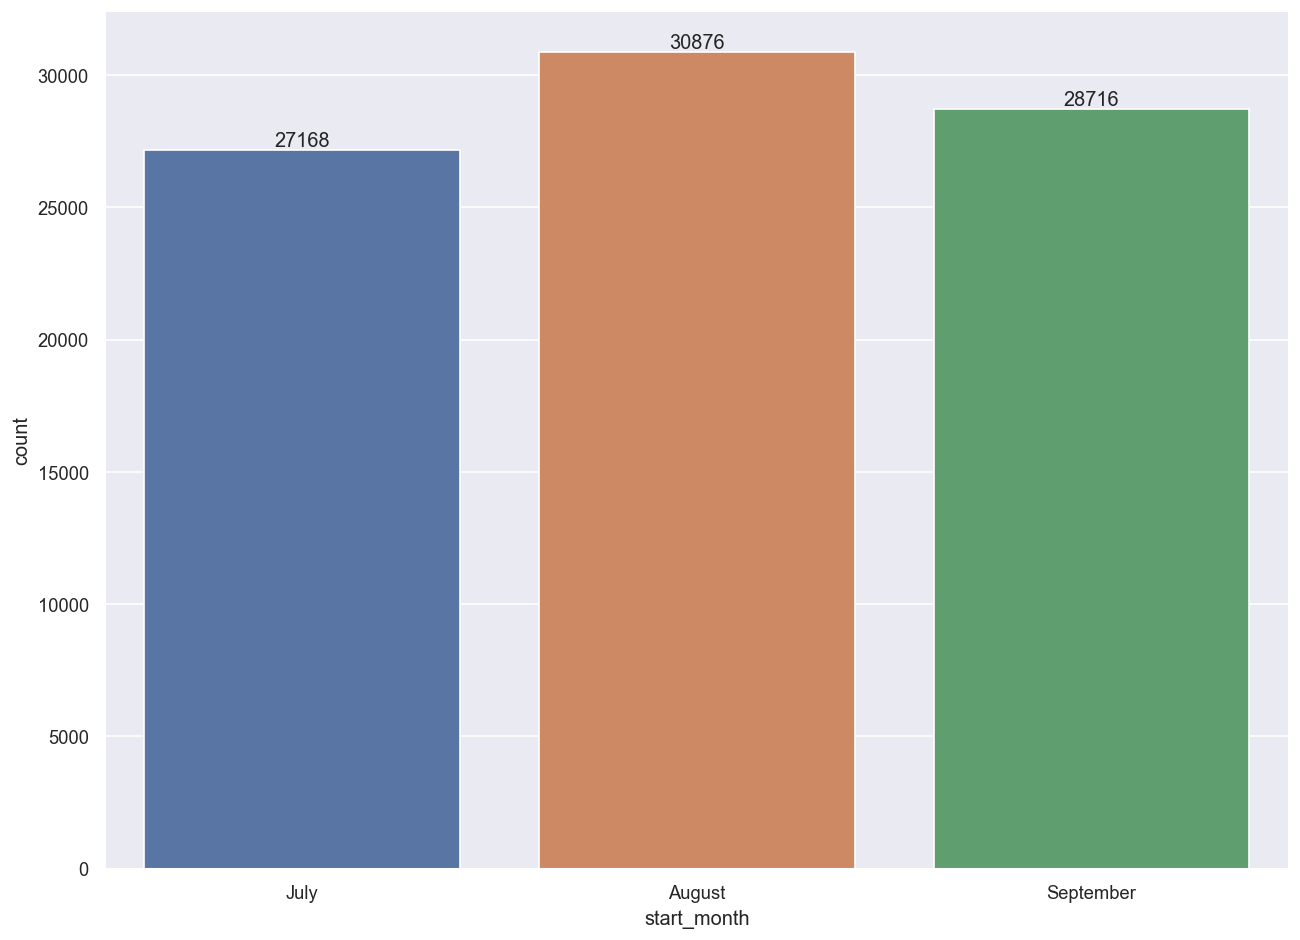

In [203]:
sns.set(rc={'figure.figsize':(11,8)})
h3 = sns.countplot(data=metro, x='start_month')
for container in h3.containers:
    h3.bar_label(container)

3.4 **(visualisation)** `plt.pie`used for producing a monthly bike distribution pie chart, essentially another graphical representation of the proportion of monthly distribution.

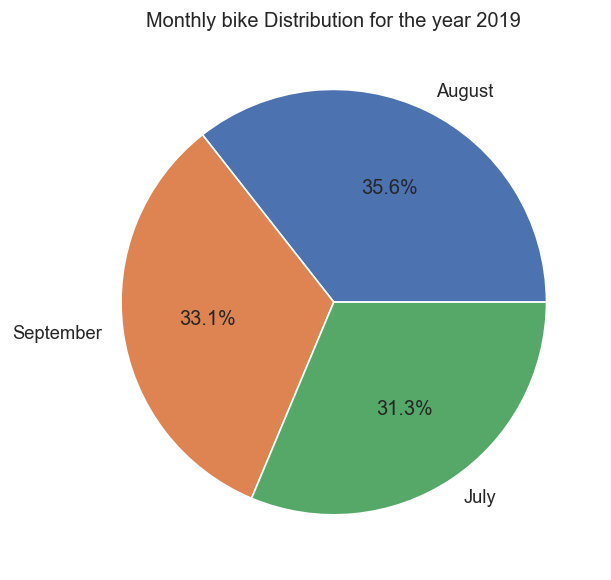

In [202]:
labels = ['August','September','July']
plt.pie(x=metro.groupby('start_month').count()['duration'].sort_values(ascending=False), autopct='%1.1f%%',labels = labels)
plt.title("Monthly bike Distribution for the year 2019")
plt.show()

3.5 **(visualisation)** `metro.groupby('start_day').count()['bike_type'].plot(figsize=(12,8))`is used for plot showing the daily bike count for the year 2019, with the number of days of a month on the x-axis and the bike count on the y-axis. 
<br>**Knowledge gained**: The evident observation here is that tuseday has the highest peak of all other days.

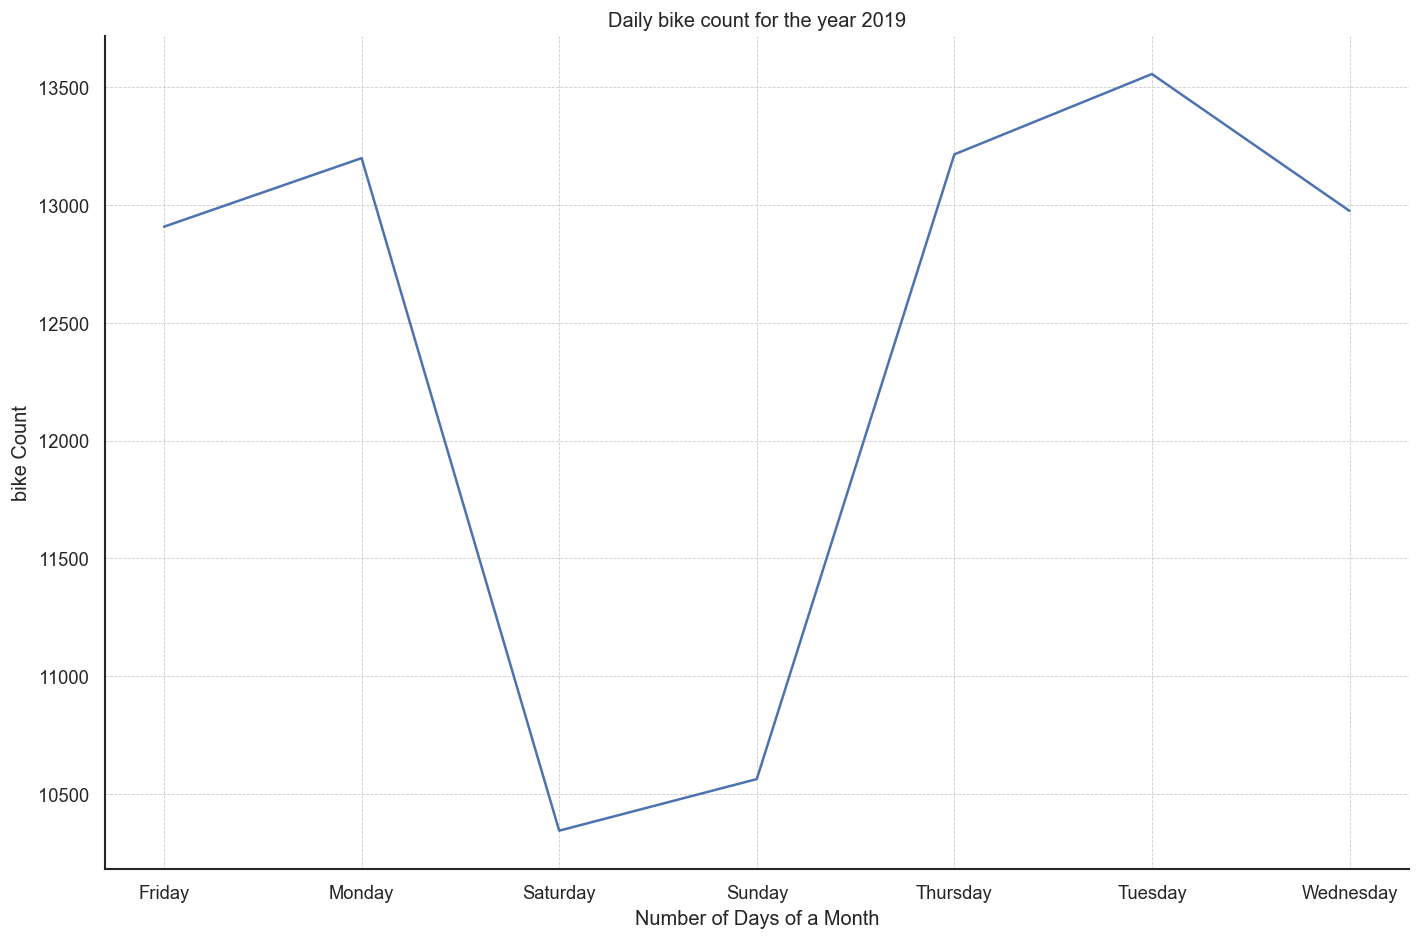

In [201]:
metro.groupby('start_day').count()['bike_type'].plot(figsize=(12,8))
plt.xlabel("Number of Days of a Month")
plt.ylabel("bike Count")
plt.title("Daily bike count for the year 2019")
plt.show()

3.6 **(visualisation)** `sns.countplot`used for plotting a bar plot of the start day column, displaying the data counts for each day of the week.
<br>**Knowledge gained**: The obvious note here is that Tuesday has the most users of any other day as observed above, followed by Monday, and Saturday has the fewest users.

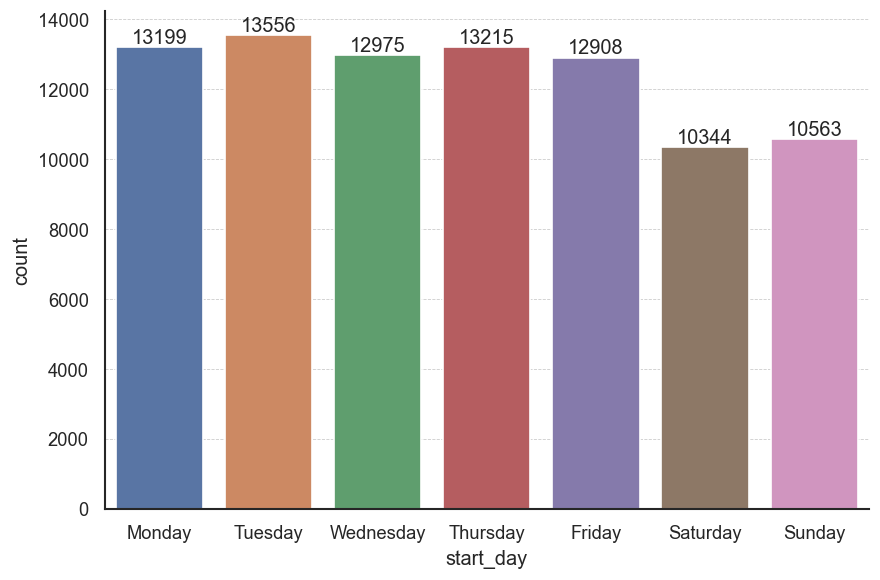

In [200]:
h4 = sns.countplot(data=metro, x='start_day')
for container in h4.containers:
    h4.bar_label(container)

3.7 `sns.countplot` graphing the distribution of bikes throughout the day to determine which hour of the day has the largest number of journey starts.
<br>**Knowledge gained:** According to the graph, the 18th hour is the busiest with a total of 8306 beginnings, while the 4th hour has the lowest count with only 150 starts for the day.

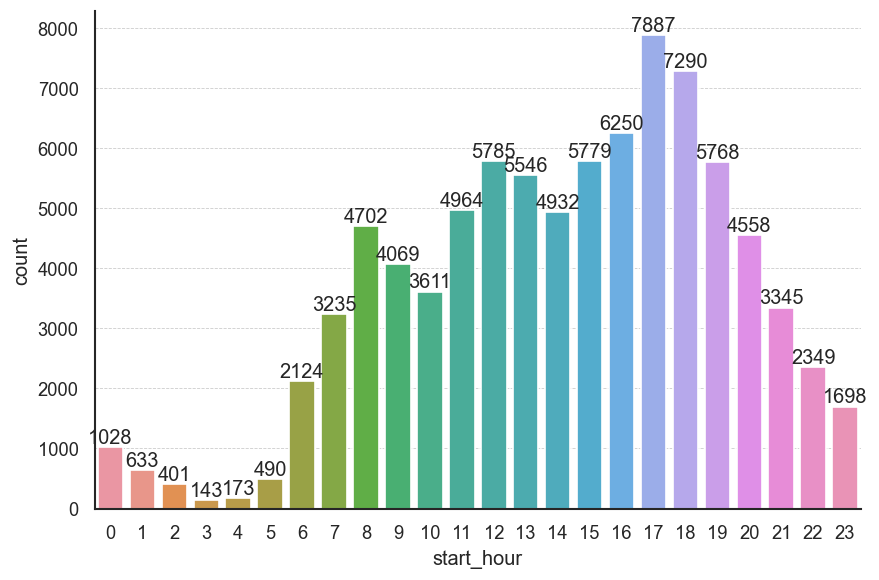

In [199]:
h5 = sns.countplot(data=metro, x='start_hour')
for container in h5.containers:
    h5.bar_label(container)

3.8 `go.Bar`Creating a bar chart with the bike type on the x-axis and the hour on the y-axis to display the mean start hour for each bike type. The obtained data is sorted by start hour values and rounded to three decimal places. The obtained data is sorted in decreasing order(using `ascending=false`) by the start_hour values and rounded to three decimal places (`round(3)`).
<br>**Knowledge gained**: At first look, it is evident that the mean start hours for each bike type are roughly identical, with electric having the highest with 14.403, followed by smart, and then standard.

In [210]:
F=metro.groupby('bike_type').start_hour.mean().to_frame().sort_values(by='start_hour',ascending=False).round(3)
allign=go.Bar(x=F.index, y=F.start_hour ,name='start_hour', marker=dict(color=['green','pink','red']))
data=[allign]
details= go.Layout(xaxis=dict(tickangle=45),title='Average start hour for bikes', yaxis=dict(title='Hours'))
fig=go.Figure(data=data, layout=details)
py.iplot(fig)

<hr style="border:2px solid black"> </hr>

### Statistical Tests

<hr style="border:.5px solid black"> </hr>


1.1 `metro.groupby('passholder_type')['duration'].mean()` calculate the average duration for each passholder category.
<br>**Knowledge gained**: The result shows the average duration of each kind of passholder, with one day pass holders having the maximum average, i.e. 79.548599 duration. Flex pass holders have the shortest average duration.

In [157]:
metro.groupby('passholder_type')['duration'].mean()

passholder_type
Annual Pass     13.066711
Flex Pass        7.333333
Monthly Pass    15.012843
One Day Pass    79.005835
Testing         26.740741
Walk-up         53.620566
Name: duration, dtype: float64

1.2 Code with their description
<br>- `pd.crosstab` creating a contingency table using two arguments: start_station and end_station.
<br>-`contingency.values`Convert the contingency table to a NumPy array with the same values as the contingency table, but without the row and column names.
<br>- `chi2_contingency()`The contingency table stored in contingency array is evaluated to a chi-square test of independence with four values: `chi2`, `p`, `dof`, and `expected`.
<br>- `print()` function is used to print each value together with the label.

<br>**Knowledge gained:** The p-value determine whether the association between the two categorical variables is significant. If the p-value is less than a predetermined significance level (0.05), you can conclude that there is a significant association between start_station and end_station.

In [164]:
contingency = pd.crosstab(metro['start_station'], metro['end_station'])
contingency_array = contingency.values
chi2, p, dof, expected= chi2_contingency(contingency_array)

#Print results
print(f'Chi-squared statistic vaule: {chi2}')
print(f'Degree of freedom: {dof}')
print(f'p-value: {p}')

sig = 0.05
if p <= sig:
    print('A strong correlation exists between the variables')
else:
    print('No correlation exists between the variables')

Chi-squared statistic vaule: 2030349.804412071
Degree of freedom: 32041
p-value: 0.0
A strong correlation exists between the variables


2 `stats.ttest_ind` used to gain t-statistic and the p-value to measure the difference between the means of the two samples, and the probability of obtaining the observed t-statistic if the null hypothesis is ture. Results are plotted as well using`plt.subplots`
<br>**Knowledge gained:** Based on the graphs and p-values, we may conclude that the 'Annual Pass' varies significantly from most passes, and the null hypothesis is rejected.
As the 'p-value' is less than 0.05, we can also reject the null hypothesis for 'One Day Pass' vs 'Walk-up' pass.

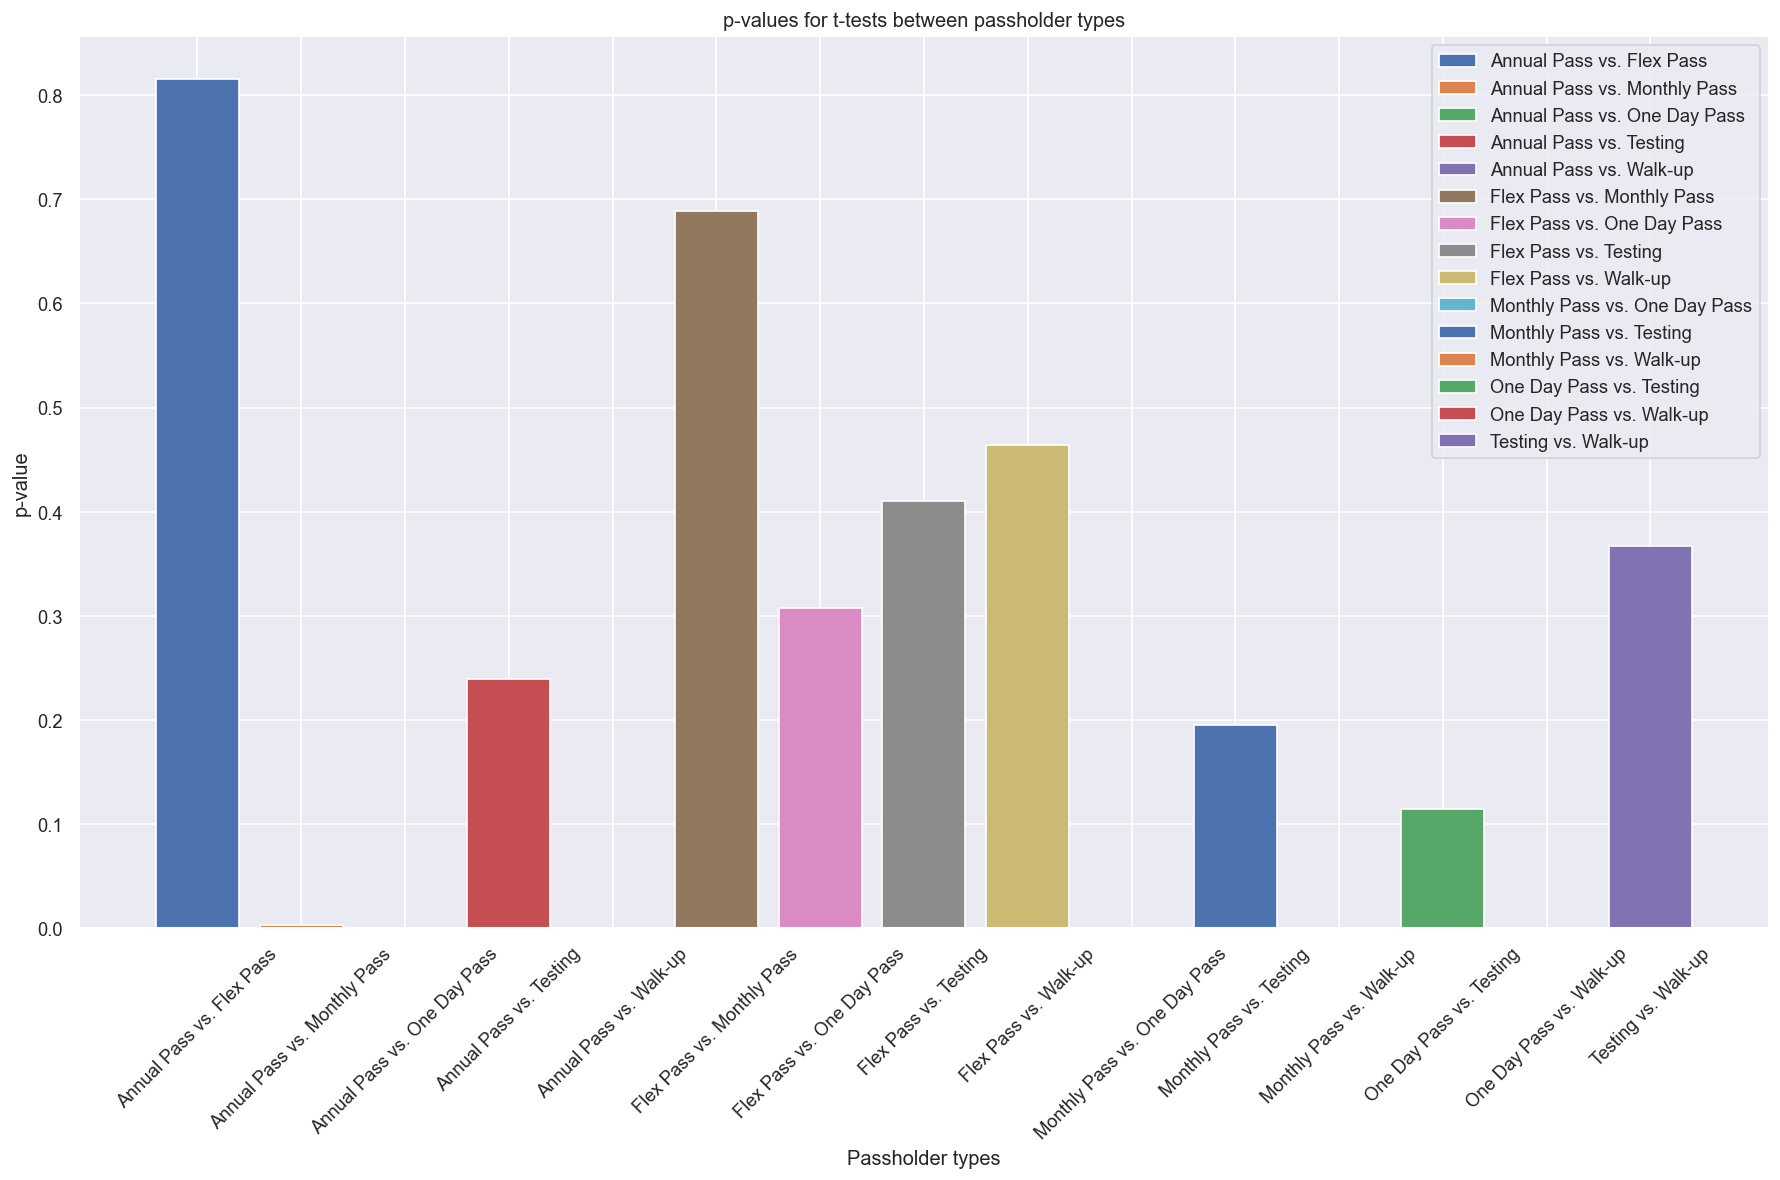

In [213]:
# Group the data by passholder type
metro_passholder = metro.groupby("passholder_type")
duration_by_passholder = metro_passholder["duration"]

# Calculate the mean duration for each passholder type
mean_duration_by_passholder = duration_by_passholder.mean()

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(15, 10), dpi=120)

# Loop through each pair of passholder types and plot the t-statistic values
for i, passholder_type1 in enumerate(mean_duration_by_passholder.index[:-1]):
    for j, passholder_type2 in enumerate(mean_duration_by_passholder.index[i+1:]):
        t_stat, p_value = stats.ttest_ind(duration_by_passholder.get_group(passholder_type1), 
                                          duration_by_passholder.get_group(passholder_type2))
        ax.bar(f"{passholder_type1} vs. {passholder_type2}", p_value, label=f"{passholder_type1} vs. {passholder_type2}")
        ax.set_title("p-values for t-tests between passholder types")
        ax.set_xlabel("Passholder types")
        ax.set_ylabel("p-value")

# Add a legend to the plot
ax.legend(loc="upper right")
ax.tick_params(axis='x', rotation=45)
plt.show()

## Resources

- **Pandas plotting**
    - Chart visualisation: https://pandas.pydata.org/docs/user_guide/visualization.html
    
- **Matplotlib**
    - Pyplot tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html
    - Colormaps: https://matplotlib.org/stable/gallery/color/colormap_reference.html

- **Seaborn**
    - Tutorial: https://seaborn.pydata.org/tutorial.html
    
- **Plotly**
    - Tutorial: https://plotly.com/python/sunburst-charts/

- **Scikit Learn** 
    - Tutorial: https://scikit-learn.org/stable/user_guide.html
    
- **Scipy**
    - Tutorial: https://docs.scipy.org/doc/scipy/
    
- **Networkx**
    - https://networkx.org/documentation/stable/tutorial.html
    - https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html